# Linear Models

## Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from yellowbrick.regressor import prediction_error

## Utils

In [29]:
def create_scaler_and_transform_data(scaler, data, transform_data=False):
    scaler.fit(data)
    if not transform_data:
        return scaler
    return scaler, scaler.transform(data)

In [70]:
def linear_regression_fit(model, x_train, y_train, x_test, y_test, show_predicted_error=True, get_coef=False):
    model.fit(x_train, y_train.squeeze())
    params = model.get_params()
    score = model.score(x_test, y_test.squeeze())
    coef = model.coef_ if get_coef else None
    if show_predicted_error:
        plt.figure(figsize=(5,5))
        prediction_error(model, x_test, y_test.squeeze(), is_fitted=True)
        plt.show()
    return score, coef, params

## Main

In [2]:
df = pd.read_csv('../../Data/international_matches_clean.csv')
df.head()

,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_score,away_team_score
0,2,2,3,67,0,0,0,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8,1,1
1,2,2,90,7,0,0,0,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2,2,2
2,2,2,25,76,0,0,0,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2,3,0
3,2,2,80,41,0,0,0,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5,1,3
4,2,2,9,38,0,0,0,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0,2,1


In [45]:
X = df[df.columns.difference(['home_team_score', 'away_team_score'])]
y = df[['home_team_score', 'away_team_score']]

In [46]:
y = [a - b for a, b in y.values]

In [47]:
X_scaler, X_scaled = create_scaler_and_transform_data(MinMaxScaler(), X, transform_data=True)
y_scaler, y_scaled = create_scaler_and_transform_data(MinMaxScaler(), np.array(y).reshape(-1, 1), transform_data=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=0)

## Linear Regression

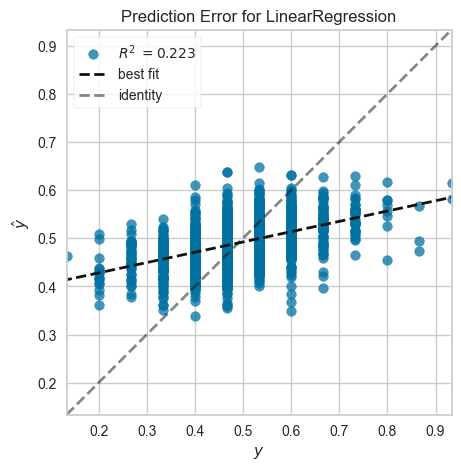

In [57]:
lr_score, lr_coef, lr_params = linear_regression_fit(LinearRegression(), X_train, y_train, X_test, y_test)

## Ridge

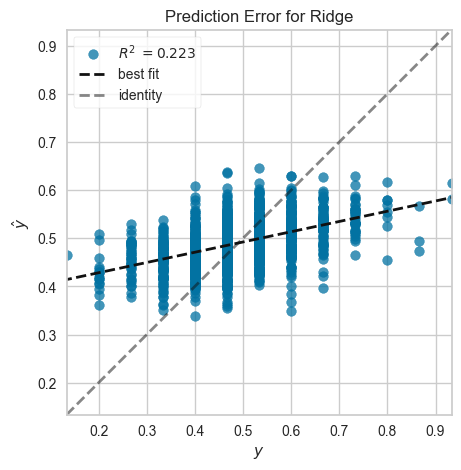

In [61]:
rd_score, rd_coef, rd_params = linear_regression_fit(Ridge(alpha=1.0), X_train, y_train, X_test, y_test)

## Lasso

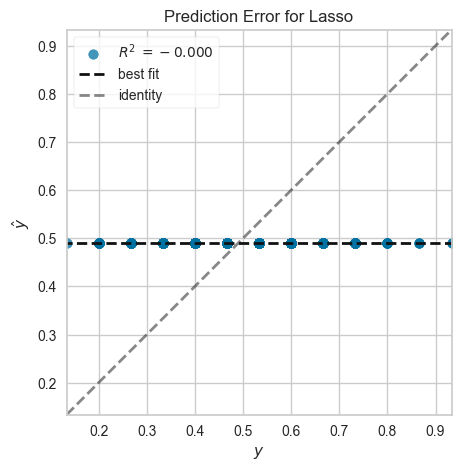

In [68]:
ls_score, ls_coef, ls_params = linear_regression_fit(Lasso(alpha=1.0), X_train, y_train, X_test, y_test)

## KNeighborsRegressor

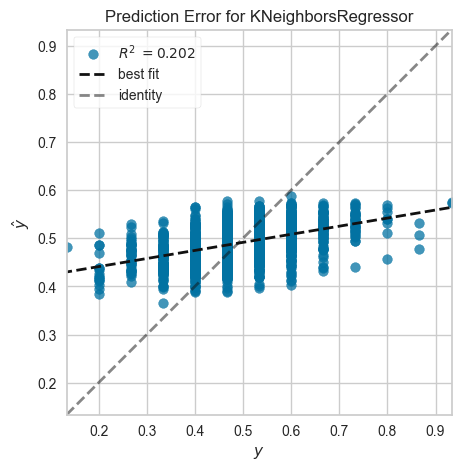

In [81]:
kn_score, kn_coef, kn_params = linear_regression_fit(KNeighborsRegressor(n_neighbors=80), X_train, y_train, X_test, y_test, get_coef=False)

## SVM

In [ ]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

## SVM ^2

In [ ]:
clf = SVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.29124709527498066